In [1]:
import pandas as pd

In [2]:
data_csv = pd.read_csv('past_results_data.csv')

In [3]:
data_csv.head()

,Date,ID,Game,Level,Date/Time,Home Team,Home Player,Away Team,Away Player,Home Score,Away Score,Status
0,29 Oct 2024,16,FIFA23,8,29/10/2024 00:45,Fiorentina\nPele,Pele,Real Betis\nAladdin,Aladdin,2.0,1.0,ENDED
1,29 Oct 2024,15,FIFA23,8,29/10/2024 00:45,Panathinaikos\nChemist,Chemist,Istanbul Basaksehir\nJack,Jack,1.0,1.0,ENDED
2,29 Oct 2024,14,FIFA23,7,29/10/2024 00:45,Atletico Madrid\nSato,Sato,Aston Villa F.C\nLoco,Loco,7.0,3.0,ENDED
3,29 Oct 2024,13,FIFA23,7,29/10/2024 00:45,AC Milan\nShelby,Shelby,Borussia Dortmund\nZangief,Zangief,7.0,2.0,ENDED
4,29 Oct 2024,14,FIFA23,7,29/10/2024 00:30,Fiorentina\nPele,Pele,Chelsea\nCantona,Cantona,0.0,3.0,ENDED


In [4]:
data_csv = data_csv.dropna()

In [5]:
data_csv.describe()

,ID,Level,Home Score,Away Score
count,45727.000000,45727.000000,45727.000000,45727.000000
mean,10.498349,5.499420,2.846458,2.857633
std,5.765219,2.871688,1.649178,1.654541
min,1.000000,1.000000,0.000000,0.000000
25%,6.000000,3.000000,2.000000,2.000000
50%,10.000000,5.000000,3.000000,3.000000
75%,15.000000,8.000000,4.000000,4.000000
max,20.000000,10.000000,33.000000,12.000000


In [6]:
data_csv['Home Outcome'] = data_csv.apply(lambda row: "Win" if row["Home Score"] > row["Away Score"] else 'Draw' if row['Home Score'] == row['Away Score'] else 'Loss', axis=1)

data_csv['Away Outcome'] = data_csv.apply(lambda row: "Win" if row["Away Score"] > row["Home Score"] else 'Draw' if row['Away Score'] == row['Home Score'] else 'Loss', axis=1)

In [7]:
data_csv.head()

,Date,ID,Game,Level,Date/Time,Home Team,Home Player,Away Team,Away Player,Home Score,Away Score,Status,Home Outcome,Away Outcome
0,29 Oct 2024,16,FIFA23,8,29/10/2024 00:45,Fiorentina\nPele,Pele,Real Betis\nAladdin,Aladdin,2.0,1.0,ENDED,Win,Loss
1,29 Oct 2024,15,FIFA23,8,29/10/2024 00:45,Panathinaikos\nChemist,Chemist,Istanbul Basaksehir\nJack,Jack,1.0,1.0,ENDED,Draw,Draw
2,29 Oct 2024,14,FIFA23,7,29/10/2024 00:45,Atletico Madrid\nSato,Sato,Aston Villa F.C\nLoco,Loco,7.0,3.0,ENDED,Win,Loss
3,29 Oct 2024,13,FIFA23,7,29/10/2024 00:45,AC Milan\nShelby,Shelby,Borussia Dortmund\nZangief,Zangief,7.0,2.0,ENDED,Win,Loss
4,29 Oct 2024,14,FIFA23,7,29/10/2024 00:30,Fiorentina\nPele,Pele,Chelsea\nCantona,Cantona,0.0,3.0,ENDED,Loss,Win


In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

home_outcome_encoded = encoder.fit_transform(data_csv['Home Outcome'])
away_outcome_encoded = encoder.fit_transform(data_csv['Away Outcome'])

home_outcome_df = pd.DataFrame(home_outcome_encoded, columns=['Home Outcome Encoded'])
away_outcome_df = pd.DataFrame(away_outcome_encoded, columns=['Away Outcome Encoded'])


In [9]:
data_csv = pd.concat([data_csv, home_outcome_df, away_outcome_df], axis=1)

In [10]:
data_csv.head()

,Date,ID,Game,Level,Date/Time,Home Team,Home Player,Away Team,Away Player,Home Score,Away Score,Status,Home Outcome,Away Outcome,Home Outcome Encoded,Away Outcome Encoded
0,29 Oct 2024,16.0,FIFA23,8.0,29/10/2024 00:45,Fiorentina\nPele,Pele,Real Betis\nAladdin,Aladdin,2.0,1.0,ENDED,Win,Loss,2.0,1.0
1,29 Oct 2024,15.0,FIFA23,8.0,29/10/2024 00:45,Panathinaikos\nChemist,Chemist,Istanbul Basaksehir\nJack,Jack,1.0,1.0,ENDED,Draw,Draw,0.0,0.0
2,29 Oct 2024,14.0,FIFA23,7.0,29/10/2024 00:45,Atletico Madrid\nSato,Sato,Aston Villa F.C\nLoco,Loco,7.0,3.0,ENDED,Win,Loss,2.0,1.0
3,29 Oct 2024,13.0,FIFA23,7.0,29/10/2024 00:45,AC Milan\nShelby,Shelby,Borussia Dortmund\nZangief,Zangief,7.0,2.0,ENDED,Win,Loss,2.0,1.0
4,29 Oct 2024,14.0,FIFA23,7.0,29/10/2024 00:30,Fiorentina\nPele,Pele,Chelsea\nCantona,Cantona,0.0,3.0,ENDED,Loss,Win,1.0,2.0


## EDA

In [11]:
home_stats = data_csv.groupby('Home Player').agg(
    Total_Home_Score=('Home Score', 'sum'),        # Total home score
    Total_Away_Score=('Away Score', 'sum'),        # Total away score they faced
    Home_Wins=('Home Outcome', lambda x: (x == 'Win').sum()),  # Wins at home
    Home_Draws=('Home Outcome', lambda x: (x == 'Draw').sum()),  # Draws at home
    Home_Losses=('Home Outcome', lambda x: (x == 'Loss').sum())   # Losses at home
).reset_index()

# Away player statistics
away_stats = data_csv.groupby('Away Player').agg(
    Total_Home_Score_Against=('Home Score', 'sum'),   # Total home score they faced
    Total_Away_Score=('Away Score', 'sum'),            # Total away score
    Away_Wins=('Away Outcome', lambda x: (x == 'Win').sum()),    # Wins away
    Away_Draws=('Away Outcome', lambda x: (x == 'Draw').sum()),   # Draws away
    Away_Losses=('Away Outcome', lambda x: (x == 'Loss').sum())    # Losses away
).reset_index()

# Merge the results
combined_stats = pd.merge(home_stats, away_stats, left_on='Home Player', right_on='Away Player', how='outer')

# Combine Wins, Losses, and Draws
combined_stats['Total_Wins'] = combined_stats['Home_Wins'].fillna(0) + combined_stats['Away_Wins'].fillna(0)
combined_stats['Total_Losses'] = combined_stats['Home_Losses'].fillna(0) + combined_stats['Away_Losses'].fillna(0)
combined_stats['Total_Draws'] = combined_stats['Home_Draws'].fillna(0) + combined_stats['Away_Draws'].fillna(0)


In [12]:
combined_stats

,Home Player,Total_Home_Score,Total_Away_Score_x,Home_Wins,Home_Draws,Home_Losses,Away Player,Total_Home_Score_Against,Total_Away_Score_y,Away_Wins,Away_Draws,Away_Losses,Total_Wins,Total_Losses,Total_Draws
0,Aladdin,3257.0,3105.0,552,239,434,Aladdin,3046.0,3289.0,572,220,430,1124,864,459
1,Anthem,2198.0,2152.0,296,118,298,Anthem,2116.0,2174.0,320,91,297,616,595,209
2,Arthur,3334.0,3078.0,549,224,469,Arthur,3108.0,3382.0,547,244,448,1096,917,468
3,Bear,1484.0,885.0,219,41,54,Bear,889.0,1533.0,220,43,51,439,105,84
4,Boris,2197.0,2449.0,318,147,408,Boris,2390.0,2153.0,319,160,396,637,804,307
5,Cantona,2660.0,3150.0,402,292,635,Cantona,3122.0,2683.0,447,295,590,849,1225,587
6,Carlos,3923.0,3894.0,498,213,502,Carlos,3919.0,3956.0,493,221,492,991,994,434
7,Chemist,3170.0,3601.0,442,315,599,Chemist,3606.0,3073.0,432,311,606,874,1205,626
8,Cruise,3137.0,3101.0,489,269,501,Cruise,3112.0,3220.0,495,272,490,984,991,541
9,David,3386.0,3539.0,478,254,540,David,3527.0,3402.0,484,264,525,962,1065,518


In [13]:
combined_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Home Player               54 non-null     object 
 1   Total_Home_Score          54 non-null     float64
 2   Total_Away_Score_x        54 non-null     float64
 3   Home_Wins                 54 non-null     int64  
 4   Home_Draws                54 non-null     int64  
 5   Home_Losses               54 non-null     int64  
 6   Away Player               54 non-null     object 
 7   Total_Home_Score_Against  54 non-null     float64
 8   Total_Away_Score_y        54 non-null     float64
 9   Away_Wins                 54 non-null     int64  
 10  Away_Draws                54 non-null     int64  
 11  Away_Losses               54 non-null     int64  
 12  Total_Wins                54 non-null     int64  
 13  Total_Losses              54 non-null     int64  
 14  Total_Draws 

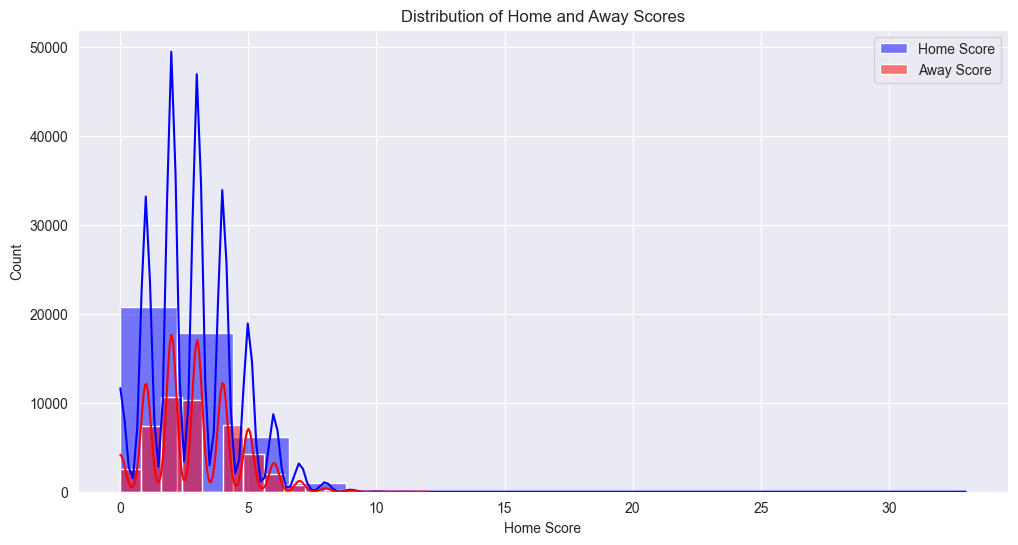

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(data_csv['Home Score'], bins=15, kde=True, color='blue', label='Home Score')
sns.histplot(data_csv['Away Score'], bins=15, kde=True, color='red', label='Away Score')
plt.title('Distribution of Home and Away Scores')
plt.legend()
plt.show()

/tmp/ipykernel_30641/2333599727.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_csv, x='Home Outcome', palette='Set2')


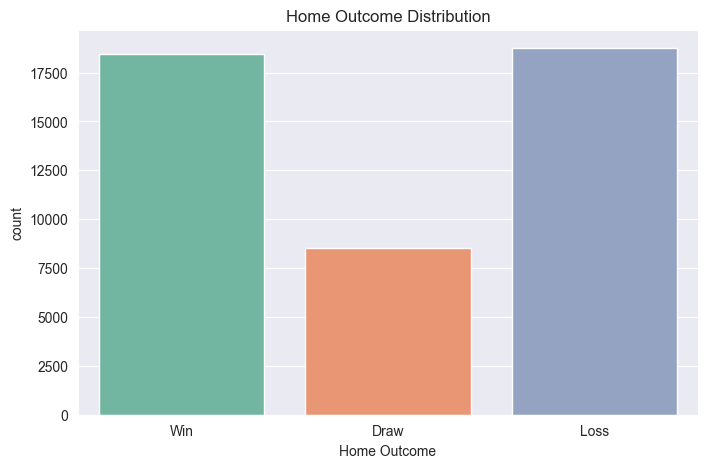

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data_csv, x='Home Outcome', palette='Set2')
plt.title('Home Outcome Distribution')
plt.show()

Date                    datetime64[ns]
ID                             float64
Game                            object
Level                          float64
Date/Time                       object
Home Team                       object
Home Player                     object
Away Team                       object
Away Player                     object
Home Score                     float64
Away Score                     float64
Status                          object
Home Outcome                    object
Away Outcome                    object
Home Outcome Encoded           float64
Away Outcome Encoded           float64
dtype: object


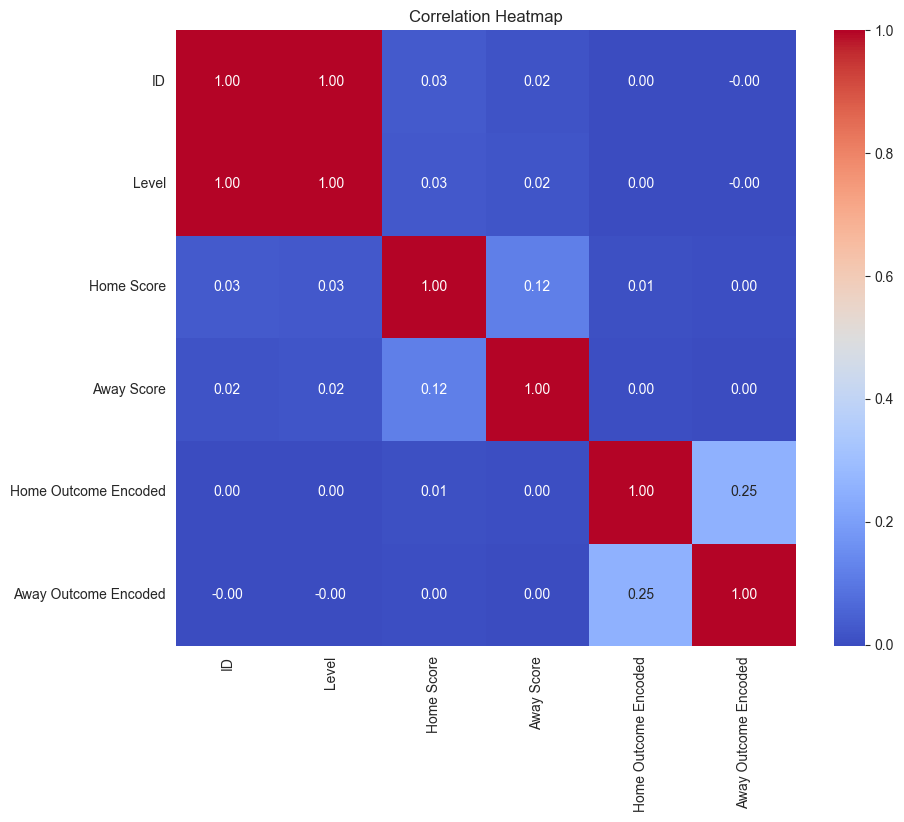

In [16]:
data_csv['Date'] = pd.to_datetime(data_csv['Date'])

# Check the data types of all columns
print(data_csv.dtypes)

# Selecting only numerical columns for correlation
numerical_data = data_csv.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
print(data_csv.columns)

print(combined_stats.columns)

Index(['Date', 'ID', 'Game', 'Level', 'Date/Time', 'Home Team', 'Home Player',
       'Away Team', 'Away Player', 'Home Score', 'Away Score', 'Status',
       'Home Outcome', 'Away Outcome', 'Home Outcome Encoded',
       'Away Outcome Encoded'],
      dtype='object')
Index(['Home Player', 'Total_Home_Score', 'Total_Away_Score_x', 'Home_Wins',
       'Home_Draws', 'Home_Losses', 'Away Player', 'Total_Home_Score_Against',
       'Total_Away_Score_y', 'Away_Wins', 'Away_Draws', 'Away_Losses',
       'Total_Wins', 'Total_Losses', 'Total_Draws'],
      dtype='object')


In [18]:
combined_stats = combined_stats.rename(columns={
    'Home Wins': 'Home Wins (Stats)',
    'Home Draws': 'Home Draws (Stats)',
    'Home Losses': 'Home Losses (Stats)',
    'Away Wins': 'Away Wins (Stats)',
    'Away Draws': 'Away Draws (Stats)',
    'Away Losses': 'Away Losses (Stats)',
    'Total_Wins': 'Total Wins (Stats)',
    'Total_Losses': 'Total Losses (Stats)',
    'Total_Draws': 'Total Draws (Stats)'
})

In [19]:
# Merge on Home Player and Away Player
merged_df = pd.merge(data_csv, combined_stats, how='left', left_on='Away Player', right_on='Away Player', suffixes=('_Away', '_Home'))


In [20]:
merged_df.head()

,Date,ID,Game,Level,Date/Time,Home Team,Home Player_Away,Away Team,Away Player,Home Score,...,Home_Draws,Home_Losses,Total_Home_Score_Against,Total_Away_Score_y,Away_Wins,Away_Draws,Away_Losses,Total Wins (Stats),Total Losses (Stats),Total Draws (Stats)
0,2024-10-29,16.0,FIFA23,8.0,29/10/2024 00:45,Fiorentina\nPele,Pele,Real Betis\nAladdin,Aladdin,2.0,...,239.0,434.0,3046.0,3289.0,572.0,220.0,430.0,1124.0,864.0,459.0
1,2024-10-29,15.0,FIFA23,8.0,29/10/2024 00:45,Panathinaikos\nChemist,Chemist,Istanbul Basaksehir\nJack,Jack,1.0,...,258.0,491.0,3048.0,3170.0,561.0,276.0,473.0,1120.0,964.0,534.0
2,2024-10-29,14.0,FIFA23,7.0,29/10/2024 00:45,Atletico Madrid\nSato,Sato,Aston Villa F.C\nLoco,Loco,7.0,...,31.0,121.0,774.0,520.0,54.0,35.0,134.0,120.0,255.0,66.0
3,2024-10-29,13.0,FIFA23,7.0,29/10/2024 00:45,AC Milan\nShelby,Shelby,Borussia Dortmund\nZangief,Zangief,7.0,...,55.0,253.0,1517.0,1183.0,119.0,69.0,232.0,230.0,485.0,124.0
4,2024-10-29,14.0,FIFA23,7.0,29/10/2024 00:30,Fiorentina\nPele,Pele,Chelsea\nCantona,Cantona,0.0,...,292.0,635.0,3122.0,2683.0,447.0,295.0,590.0,849.0,1225.0,587.0


In [21]:
merged_df = merged_df.dropna()

In [22]:

merged_df['Outcome_Encoded'] = encoder.fit_transform(merged_df['Home Outcome'])
outcome_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Outcome Encoding:", outcome_mapping) 

Outcome Encoding: {'Draw': 0, 'Loss': 1, 'Win': 2}


In [23]:
from sklearn.preprocessing import MinMaxScaler

# Select features related to player performance and stats
features = [
    'Total_Home_Score', 'Total_Away_Score_x', 'Home_Wins', 'Home_Draws', 'Home_Losses',
    'Total_Home_Score_Against', 'Total_Away_Score_y', 'Away_Wins', 'Away_Draws', 'Away_Losses'
]

# Normalize selected features for improved performance
scaler = MinMaxScaler()
merged_df[features] = scaler.fit_transform(merged_df[features])

In [24]:
from keras.utils import to_categorical
import numpy as np

# Define the sequence length
sequence_length =20

# Prepare sequences for LSTM - we'll use rolling windows of last 5 games
X, y = [], []
for i in range(sequence_length, len(merged_df)):
    X.append(merged_df[features].iloc[i-sequence_length:i].values)
    y.append(merged_df['Outcome_Encoded'].iloc[i])

# Convert to numpy arrays
X, y = np.array(X), np.array(y)

# Convert target variable to categorical for multiclass classification
y = to_categorical(y, num_classes=3)


2024-11-08 16:07:00.621026: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-08 16:07:00.754664: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-08 16:07:00.853462: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731071220.944617   30641 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731071220.969191   30641 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-08 16:07:01.187035: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [25]:
processed_data = []

# Iterate over each match
for index, row in merged_df.iterrows():
    home_player = row['Home Player_Away']
    away_player = row['Away Player']
    
    # Collect features for the home player
    home_features = [
        row['Total_Home_Score'],
        row['Total_Away_Score_x'],
        row['Home_Wins'],
        row['Home_Draws'],
        row['Home_Losses'],
        row['Total_Home_Score_Against'],
        # Add away player metrics for the same match
        row['Total_Away_Score_y'],
        row['Away_Wins'],
        row['Away_Draws'],
        row['Away_Losses']
    ]
    
    # Combine features with outcome
    processed_data.append((home_player, away_player, home_features, row['Home Outcome Encoded']))

# Convert processed data to a DataFrame
processed_df = pd.DataFrame(processed_data, columns=['Home Player', 'Away Player', 'Features', 'Outcome'])


In [26]:
# Prepare the input features and labels
X = np.array(list(processed_df['Features']))
y = np.array(processed_df['Outcome'])

# If using categorical encoding for outcomes
from keras.utils import to_categorical
y = to_categorical(y, num_classes=3)  # Assuming 3 outcomes: Win, Draw, Loss


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [29]:
X.shape

(43299, 10)

In [30]:
# model = Sequential()
# model.add(LSTM(64, return_sequences=True, input_shape=(X.shape[0], X.shape[1])))
# model.add(Dropout(0.2))
# model.add(LSTM(32, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(3, activation='softmax'))  # Softmax for multiclass probability outputs
# 
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [31]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

2024-11-08 16:08:08.604543: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/roy/machine-learning/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)

# Train the model

history = model.fit(X_train, y_train, epochs=250, batch_size=100, validation_data=(X_test, y_test))


304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4031 - loss: 1.0444 - val_accuracy: 0.4103 - val_loss: 1.0470
Epoch 104/250
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4082 - loss: 1.0449 - val_accuracy: 0.3954 - val_loss: 1.0471
Epoch 105/250
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4094 - loss: 1.0427 - val_accuracy: 0.4103 - val_loss: 1.0471
Epoch 106/250
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4082 - loss: 1.0425 - val_accuracy: 0.4103 - val_loss: 1.0470
Epoch 107/250
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4107 - loss: 1.0462 - val_accuracy: 0.4103 - val_loss: 1.0471
Epoch 108/250
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4068 - loss: 1.0485 - val_accuracy: 0.4103 - val_loss: 1.0472
Epoch 109/250
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4108 - loss: 1.0415 - val_accuracy: 0.4103 - val_loss: 1.0470
Epoch 110/250
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4119 - loss: 1.0454 - val_ac


y = data_csv['target']

In [33]:
def predict_outcome(player_x, player_y):
    # Find the row with these players
    player_stats = merged_df[(merged_df['Home Player_Away'] == player_x) & (merged_df['Away Player'] == player_y)]
    
    if player_stats.empty:
        return "Match data not available."

    # Assuming only one row for the pair
    row = player_stats.iloc[0]
    
    # Extract features as needed
    features = [
        row['Total_Home_Score'],
        row['Total_Away_Score_x'],
        row['Home_Wins'],
        row['Home_Draws'],
        row['Home_Losses'],
        row['Total_Home_Score_Against'],
        row['Total_Away_Score_y'],
        row['Away_Wins'],
        row['Away_Draws'],
        row['Away_Losses']
    ]
    
    # Prepare input for the model
    features_reshaped = np.array(features).reshape((1, len(features), 1))
    
    # Make the prediction
    prediction = model.predict(features_reshaped)
    
    # Convert probabilities to chances of Win, Draw, Loss
    chances = {
        "Win": prediction[0][2],
        "Draw": prediction[0][0],
        "Loss": prediction[0][1]
    }
    
    return chances

# Example Prediction
chances = predict_outcome("Pele", "Aladdin")
chances_percentage = {k: round(v * 100) for k, v in chances.items()}
print("Chances of Winning, Drawing, and Losing (%):", chances_percentage)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Chances of Winning, Drawing, and Losing (%): {'Win': 40, 'Draw': 19, 'Loss': 41}


In [34]:
model.export('my_model')

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


Saved artifact at 'my_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  139986677412880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139989630143184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139986677414032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139986563658384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139986563659920: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [37]:
tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model path_to_model/my_model path_to_model/my_model_js


SyntaxError: cannot assign to expression (2996439442.py, line 1)